In [44]:
import numpy as np
import sklearn.datasets as datasets
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from numpy.polynomial.polynomial import polyfit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [45]:
df = pd.read_csv('temp_output.csv', sep=',', index_col=0)

In [46]:
df.head()

,area,price,building_state,facades,bedrooms,kitchen_equipped,furnished,open_fire,locality,land_surface,terrace,terrace_surface,swimming_pool,property_type,property_subtype,garden,garden_surface
0,123.0,200000.0,good,3.000000,2.0,installed,False,1.144966,3294,429.0,False,0,False,house,house,True,350
1,255.0,698000.0,just renovated,4.000000,4.0,installed,False,1.144966,2070,1210.0,False,0,False,house,villa,False,0
2,234.0,499000.0,as new,2.970242,5.0,undefined,False,1.144966,8800,744.0,False,0,False,house,villa,False,0
3,219.0,717000.0,as new,2.970242,4.0,undefined,False,1.144966,8000,760.0,False,0,False,house,house,False,0
4,156.0,429000.0,good,4.000000,4.0,installed,False,1.144966,8800,419.0,False,0,False,house,villa,True,90


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10058 entries, 0 to 10091
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area              10058 non-null  float64
 1   price             10058 non-null  float64
 2   building_state    10058 non-null  object 
 3   facades           10058 non-null  float64
 4   bedrooms          10058 non-null  float64
 5   kitchen_equipped  10058 non-null  object 
 6   furnished         10058 non-null  bool   
 7   open_fire         10058 non-null  float64
 8   locality          10058 non-null  int64  
 9   land_surface      10058 non-null  float64
 10  terrace           10058 non-null  bool   
 11  terrace_surface   10058 non-null  int64  
 12  swimming_pool     10058 non-null  bool   
 13  property_type     10058 non-null  object 
 14  property_subtype  10058 non-null  object 
 15  garden            10058 non-null  bool   
 16  garden_surface    10058 non-null  int64 

<AxesSubplot:>

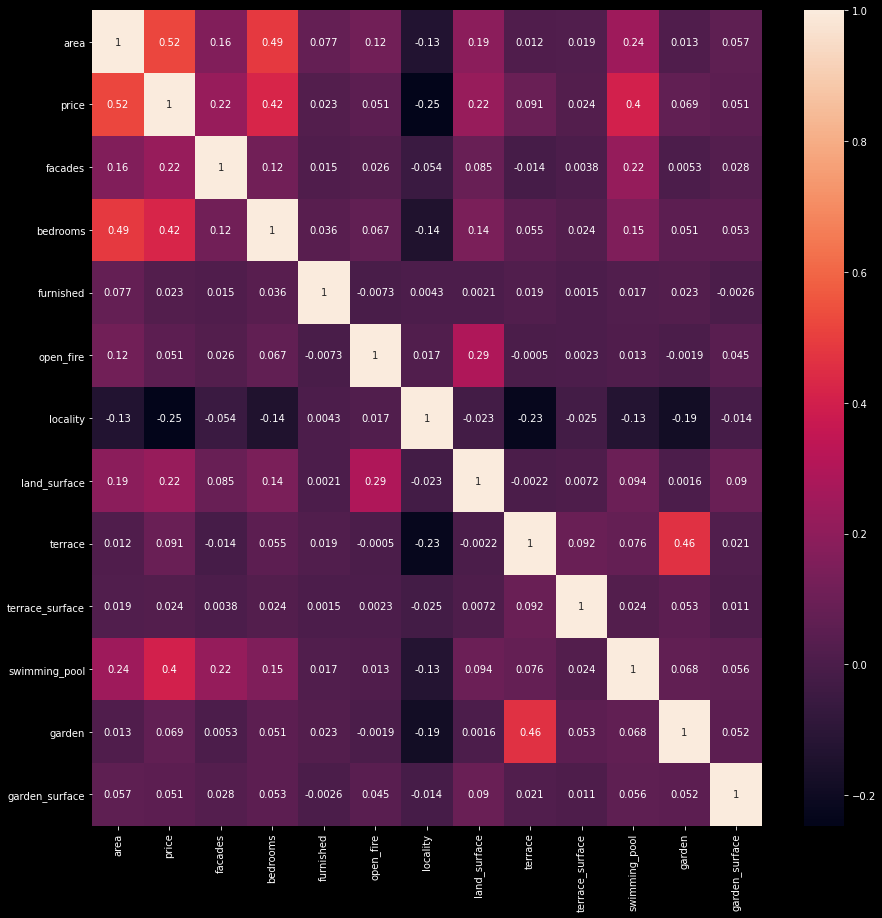

In [48]:
fig = plt.figure(figsize=(15,15))
plt.style.use('dark_background')
sns.heatmap(df.corr(), annot=True)

In [49]:
df.price.sort_values(ascending=False).head(10)

4972    9500000.0
2098    9500000.0
9923    9500000.0
8852    6900000.0
8216    6500000.0
6289    5950000.0
8507    5950000.0
5298    5950000.0
7657    5950000.0
9333    5950000.0
Name: price, dtype: float64

In [50]:
df.bedrooms.sort_values(ascending=False).head(10)

2090    50.0
8541    41.0
7146    41.0
8666    39.0
9649    32.0
3297    30.0
1626    30.0
5604    24.0
6041    22.0
6681    22.0
Name: bedrooms, dtype: float64

In [51]:
df_cut = df.copy()

In [52]:
df_cut = df_cut[df_cut.price <= 5000000.0]

In [53]:
df_cut = df_cut[df_cut.price >= 10000.0]

In [54]:
df_cut = df_cut[df_cut.bedrooms <= 10.0]

In [55]:
df_cut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9978 entries, 0 to 10091
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area              9978 non-null   float64
 1   price             9978 non-null   float64
 2   building_state    9978 non-null   object 
 3   facades           9978 non-null   float64
 4   bedrooms          9978 non-null   float64
 5   kitchen_equipped  9978 non-null   object 
 6   furnished         9978 non-null   bool   
 7   open_fire         9978 non-null   float64
 8   locality          9978 non-null   int64  
 9   land_surface      9978 non-null   float64
 10  terrace           9978 non-null   bool   
 11  terrace_surface   9978 non-null   int64  
 12  swimming_pool     9978 non-null   bool   
 13  property_type     9978 non-null   object 
 14  property_subtype  9978 non-null   object 
 15  garden            9978 non-null   bool   
 16  garden_surface    9978 non-null   int64  

In [56]:
#x_1 = df_cut['area'].to_numpy().reshape(9978, 1)
#x_2 = df_cut['bedrooms'].to_numpy().reshape(9978, 1)
#y = df_cut['price']

In [57]:
#print(x_1.shape)
#print(x_2.shape)
#print(y.shape)
#print(type(x_1))
#print(type(x_2))
#print(type(y))

(9978, 1)
(9978, 1)
(9978,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [58]:
#X_1train, X_1test, y_1train, y_1test = train_test_split(x_1, y, random_state=45, test_size=0.2)
#X_2train, X_2test, y_2train, y_2test = train_test_split(x_2, y, random_state=45, test_size=0.2)

In [59]:
#def dof_test(dof):
#    model_1 = make_pipeline(PolynomialFeatures(degree=dof), linear_model.LinearRegression())
#    model_2 = make_pipeline(PolynomialFeatures(degree=dof), linear_model.LinearRegression())
#    model_1.fit(X_1train, y_1train)
#    model_2.fit(X_2train, y_1train)
#    prediction_1 = model_1.predict(X_1test)
#    train_score1 = model_1.score(X_1train, y_1train)
#    train_score1 = train_score1 * 100
#    test_score1 = model_1.score(X_1test, y_1test)
#    test_score1 = test_score1 * 100
#    print(f'Train score (dof = {dof}) feature area: {train_score1} %')
#    print(f'Test score (dof = {dof}) feature area: {test_score1} %')
#    prediction_2 = model_2.predict(X_2test)
#    train_score2 = model_2.score(X_2train, y_2train)
#    train_score2 = train_score2 * 100
#    test_score2 = model_2.score(X_2test, y_2test)
#    test_score2 = test_score2 * 100
#    print(f'Train score (dof = {dof}) feature bedrooms: {train_score2} %')
#    print(f'Test score (dof = {dof}) feature bedrooms: {test_score2} %\n')
#    return prediction_1, prediction_2

In [60]:
#for dof in range(1,10):
#    prediction1, prediction2 = dof_test(dof)

Train score (dof = 1) feature area: 22.998666401919976 %
Test score (dof = 1) feature area: 34.759426886298904 %
Train score (dof = 1) feature bedrooms: 20.515420094107938 %
Test score (dof = 1) feature bedrooms: 22.090001719245077 %

Train score (dof = 2) feature area: 40.52344296337921 %
Test score (dof = 2) feature area: 43.28355209418019 %
Train score (dof = 2) feature bedrooms: 20.51560806840078 %
Test score (dof = 2) feature bedrooms: 22.08736106119249 %

Train score (dof = 3) feature area: 42.429842946945854 %
Test score (dof = 3) feature area: 44.86796540075505 %
Train score (dof = 3) feature bedrooms: 22.356396847069092 %
Test score (dof = 3) feature bedrooms: 24.30660835324018 %

Train score (dof = 4) feature area: 42.454788352804144 %
Test score (dof = 4) feature area: 44.75637297487707 %
Train score (dof = 4) feature bedrooms: 22.35743553971641 %
Test score (dof = 4) feature bedrooms: 24.296045044365002 %

Train score (dof = 5) feature area: 42.608653505405044 %
Test score 

In [61]:
x = df_cut[['area', 'bedrooms']]
y = df_cut['price']

In [62]:
#def dof_test(dof):
#    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=45, test_size=0.2)
#    model = make_pipeline(PolynomialFeatures(degree=dof), linear_model.LinearRegression())
#    model.fit(X_train, y_train)
#    prediction = model.predict(X_test)
#    train_score = model.score(X_train, y_train)
#    train_score = train_score * 100
#    test_score = model.score(X_test, y_test)
#    test_score = test_score * 100
#    print(f'Train score (dof = {dof}) features area and bedrooms: {train_score} %')
#    print(f'Test score (dof = {dof}) features area and bedrooms: {test_score} %\n')
#    return prediction

In [63]:
#for dof in range(1,10):
#    multi_prediction = dof_test(dof)

Train score (dof = 1) features area and bedrooms: 31.294923250591765 %
Test score (dof = 1) features area and bedrooms: 39.21950542500993 %

Train score (dof = 2) features area and bedrooms: 42.99321762558919 %
Test score (dof = 2) features area and bedrooms: 46.472962485006455 %

Train score (dof = 3) features area and bedrooms: 47.29144936734729 %
Test score (dof = 3) features area and bedrooms: 52.32576988849609 %

Train score (dof = 4) features area and bedrooms: 47.80220051078344 %
Test score (dof = 4) features area and bedrooms: 52.6614624863633 %

Train score (dof = 5) features area and bedrooms: 49.15439705132874 %
Test score (dof = 5) features area and bedrooms: 34.579476362283934 %

Train score (dof = 6) features area and bedrooms: 45.55822713879628 %
Test score (dof = 6) features area and bedrooms: -291.8411241388465 %

Train score (dof = 7) features area and bedrooms: 35.21583736449448 %
Test score (dof = 7) features area and bedrooms: -3472.8733279443604 %

Train score (do

In [67]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=45, test_size=0.2)
model = make_pipeline(PolynomialFeatures(degree=4), linear_model.LinearRegression())
model.fit(X_train, y_train)
prediction = model.predict(X_test)

Text(0.5, 0.92, 'Price prediction area&bedrooms features')

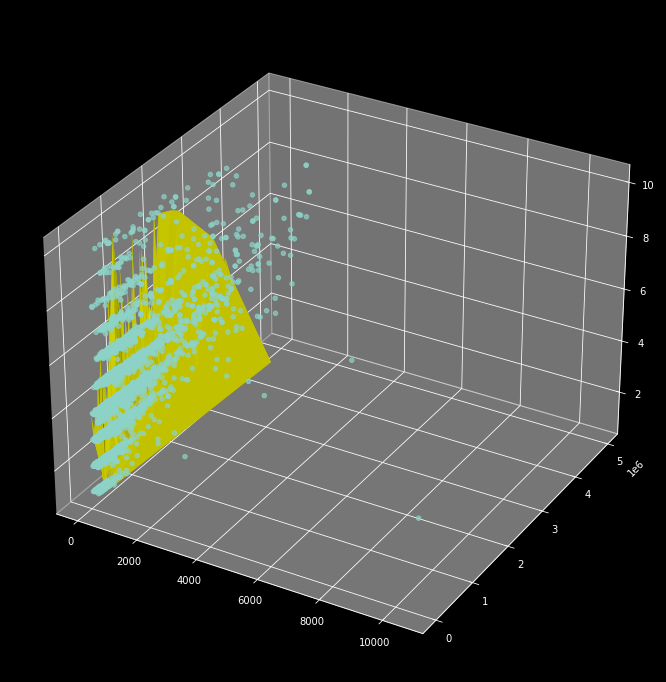

In [80]:
fig = plt.figure(figsize=(15,12))
ax = plt.axes(projection='3d')
ax.scatter(x['area'], y, x['bedrooms'], alpha=0.7)
ax.plot_trisurf(X_test['area'], prediction, X_test['bedrooms'], color='yellow')
plt.title('Price prediction area&bedrooms features', color='black')
#ax.view_init(elev=0, azim=-45)
